# CorpBond Default Prediction

In [1]:
# pandas, numpy, and plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats
from statsmodels.graphics import tsaplots

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Logistic Regression
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

# Evaluation Matric
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_recall_fscore_support as score

# Sampling Method
from imblearn.under_sampling import RandomUnderSampler


## data read and replace na to zero


In [2]:
CorpBond_dtn = pd.read_csv('CorpBond_ML_Fin.csv')

In [3]:
print(CorpBond_dtn.isnull().sum())

year        0
fail        0
yearfail    0
LnFD        0
TBTA        0
TBEBITDA    0
CLCA        0
CLTL        0
TLTA        0
BETL        0
IESL        0
LnCA        0
LnTA        0
LnTAGDP     0
LABOR       0
TAGR        0
SLGR        0
NIGR        0
RETA        0
ROIC        0
EBITTA      0
EBITSL      0
EBITFC      0
EBITDATL    0
EBITDAFC    0
IBITSL      0
NITA        0
ROE         0
CASHTA      0
WCTA        0
QACL        0
CFOTA       0
CFOTB       0
CFOTL       0
GCFTB       0
SLTA        0
LnSLTA      0
dtype: int64


In [4]:
feature_col=['TBTA',
         'TBEBITDA',
         'CLTL',
         'TLTA',
         'BETL',
         'IESL',
         'EBITFC',
         'EBITDAFC',            
         'EBITDATL',
         'LnCA',
         'LnTA',
         'LnTAGDP',
         'LABOR',
         'LnFD',
         'TAGR',
         'SLGR',
         'NIGR',
         'RETA',
         'ROIC',
         'EBITTA',
         'EBITSL',
         'IBITSL',
         'NITA',
         'ROE',
         'CASHTA',
         'WCTA',
         'QACL',
         'CLCA',
         'CFOTA',
         'CFOTB',
         'CFOTL',
         'GCFTB',
         'SLTA',
         'LnSLTA']

In [5]:
CorpBond_dtn.dtypes

year          int64
fail          int64
yearfail      int64
LnFD        float64
TBTA        float64
TBEBITDA    float64
CLCA        float64
CLTL        float64
TLTA        float64
BETL        float64
IESL        float64
LnCA        float64
LnTA        float64
LnTAGDP     float64
LABOR       float64
TAGR        float64
SLGR        float64
NIGR        float64
RETA        float64
ROIC        float64
EBITTA      float64
EBITSL      float64
EBITFC      float64
EBITDATL    float64
EBITDAFC    float64
IBITSL      float64
NITA        float64
ROE         float64
CASHTA      float64
WCTA        float64
QACL        float64
CFOTA       float64
CFOTB       float64
CFOTL       float64
GCFTB       float64
SLTA        float64
LnSLTA      float64
dtype: object

In [6]:
CorpBond_dtn

,year,fail,yearfail,LnFD,TBTA,TBEBITDA,CLCA,CLTL,TLTA,BETL,...,ROE,CASHTA,WCTA,QACL,CFOTA,CFOTB,CFOTL,GCFTB,SLTA,LnSLTA
0,101,0,1010,-0.754132,1.560554,0.062300,-0.131949,0.707339,1.233367,-0.881250,...,0.515386,3.148481,-0.305260,-0.011566,0.142635,-0.295633,-0.127202,0.252256,-0.528927,-0.317652
1,101,0,1010,0.018376,2.125076,0.496316,0.151415,0.193808,1.470858,-0.966504,...,0.163162,0.371964,-0.775383,-0.765082,-1.579298,-0.710559,-1.182527,0.156212,-0.211386,0.063693
2,101,0,1010,-0.584716,1.089486,-0.153332,-0.499944,0.010201,0.878669,-0.732573,...,0.162509,0.355068,0.579737,-0.100872,-0.196242,-0.373682,-0.326880,-0.108258,-0.578137,-0.385566
3,101,0,1010,-0.417594,-0.404373,-0.330683,-0.101483,0.344986,0.248350,-0.413435,...,0.747418,0.292035,-0.320642,-0.476802,2.267123,1.198993,1.801068,1.103744,0.577373,0.745473
4,101,0,1010,-0.879208,1.365084,-1.957599,-0.670447,-0.986377,0.556523,-0.591869,...,-0.966326,1.988457,0.741827,0.470595,0.034627,-0.316387,-0.142273,-0.110214,-0.171491,0.105897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195,120,0,1200,0.606625,-0.573737,-0.006067,-0.417616,-0.594064,-0.880299,0.550527,...,0.107042,-0.846117,0.076537,0.510586,1.148355,0.564842,1.303804,0.472918,-0.656872,-0.500436
6196,120,0,1200,0.496167,0.996526,0.022496,-1.017048,-2.229393,0.463323,-0.531001,...,0.616677,-0.870424,0.402513,2.984793,0.689757,-0.095541,0.358249,0.098582,-1.085403,-1.324097
6197,120,0,1200,0.377615,-0.782041,-0.281445,-0.666640,0.481101,0.244937,-0.413849,...,0.284804,3.148481,1.182248,0.618058,0.814477,0.482751,0.506988,-0.577361,0.893840,0.955305
6198,120,0,1200,0.324517,0.252762,1.101032,1.286341,0.364747,-0.249478,-0.072973,...,0.103927,-0.900498,-1.253728,-0.967160,-0.054940,-0.285147,-0.132601,0.749802,-0.614070,-0.436995


### 회사의 수와 부도율 계산

In [7]:
Failure_dt = CorpBond_dtn

In [8]:
C_Total_Firm = Failure_dt.shape[0]
C_Fail_Firm  = Failure_dt[Failure_dt['fail'] == 1].shape[0]

print(C_Total_Firm)
print(C_Total_Firm - C_Fail_Firm)
print(C_Fail_Firm)
print(C_Fail_Firm/ C_Total_Firm)

TBL1 = pd.DataFrame([C_Total_Firm, C_Total_Firm - C_Fail_Firm, C_Fail_Firm, C_Fail_Firm/ C_Total_Firm])
TBL1

6200
5995
205
0.03306451612903226


,0
0,6200.000000
1,5995.000000
2,205.000000
3,0.033065


In [9]:
TBL1a = pd.concat([CorpBond_dtn[['year','fail']].groupby('year').count(),
                   CorpBond_dtn[['year','fail']].groupby('year').sum()], axis = 1)

TBL1a

,fail,fail
year,,
101,210,26
102,116,21
103,277,12
104,318,7
105,391,14
106,345,12
107,256,8
108,253,13
109,260,3


In [10]:
TBL3 = CorpBond_dtn[feature_col].describe().T
TBL3

,count,mean,std,min,25%,50%,75%,max
TBTA,6200.0,-0.031770,0.994615,-1.834832,-0.778796,-0.079873,0.645014,2.143046
TBEBITDA,6200.0,-0.014019,0.995040,-2.718075,-0.358686,-0.152876,0.185736,3.731316
CLTL,6200.0,0.019477,1.006152,-2.229393,-0.652585,0.089566,0.784988,1.746057
TLTA,6200.0,-0.031064,0.993643,-2.179479,-0.710185,0.023866,0.675927,1.890511
BETL,6200.0,0.022532,1.001410,-1.101552,-0.641686,-0.271567,0.345224,3.472040
IESL,6200.0,0.005907,1.012113,-0.903180,-0.679637,-0.342322,0.296943,3.725509
EBITFC,6200.0,0.001214,1.009222,-0.957720,-0.391356,-0.293297,-0.048135,4.808878
EBITDAFC,6200.0,0.000308,1.005278,-0.818254,-0.390987,-0.301487,-0.055701,4.915315
EBITDATL,6200.0,0.013046,1.032207,-2.381321,-0.499853,-0.124656,0.416244,3.135858
LnCA,6200.0,-0.010436,1.008427,-2.528008,-0.675679,0.002656,0.686255,2.003661


### 상관관계 분석

In [11]:
heatmap_dt = CorpBond_dtn[['fail', *feature_col]]

In [12]:
heatmap_dt = heatmap_dt.rename(columns={'fail': 'Default'})

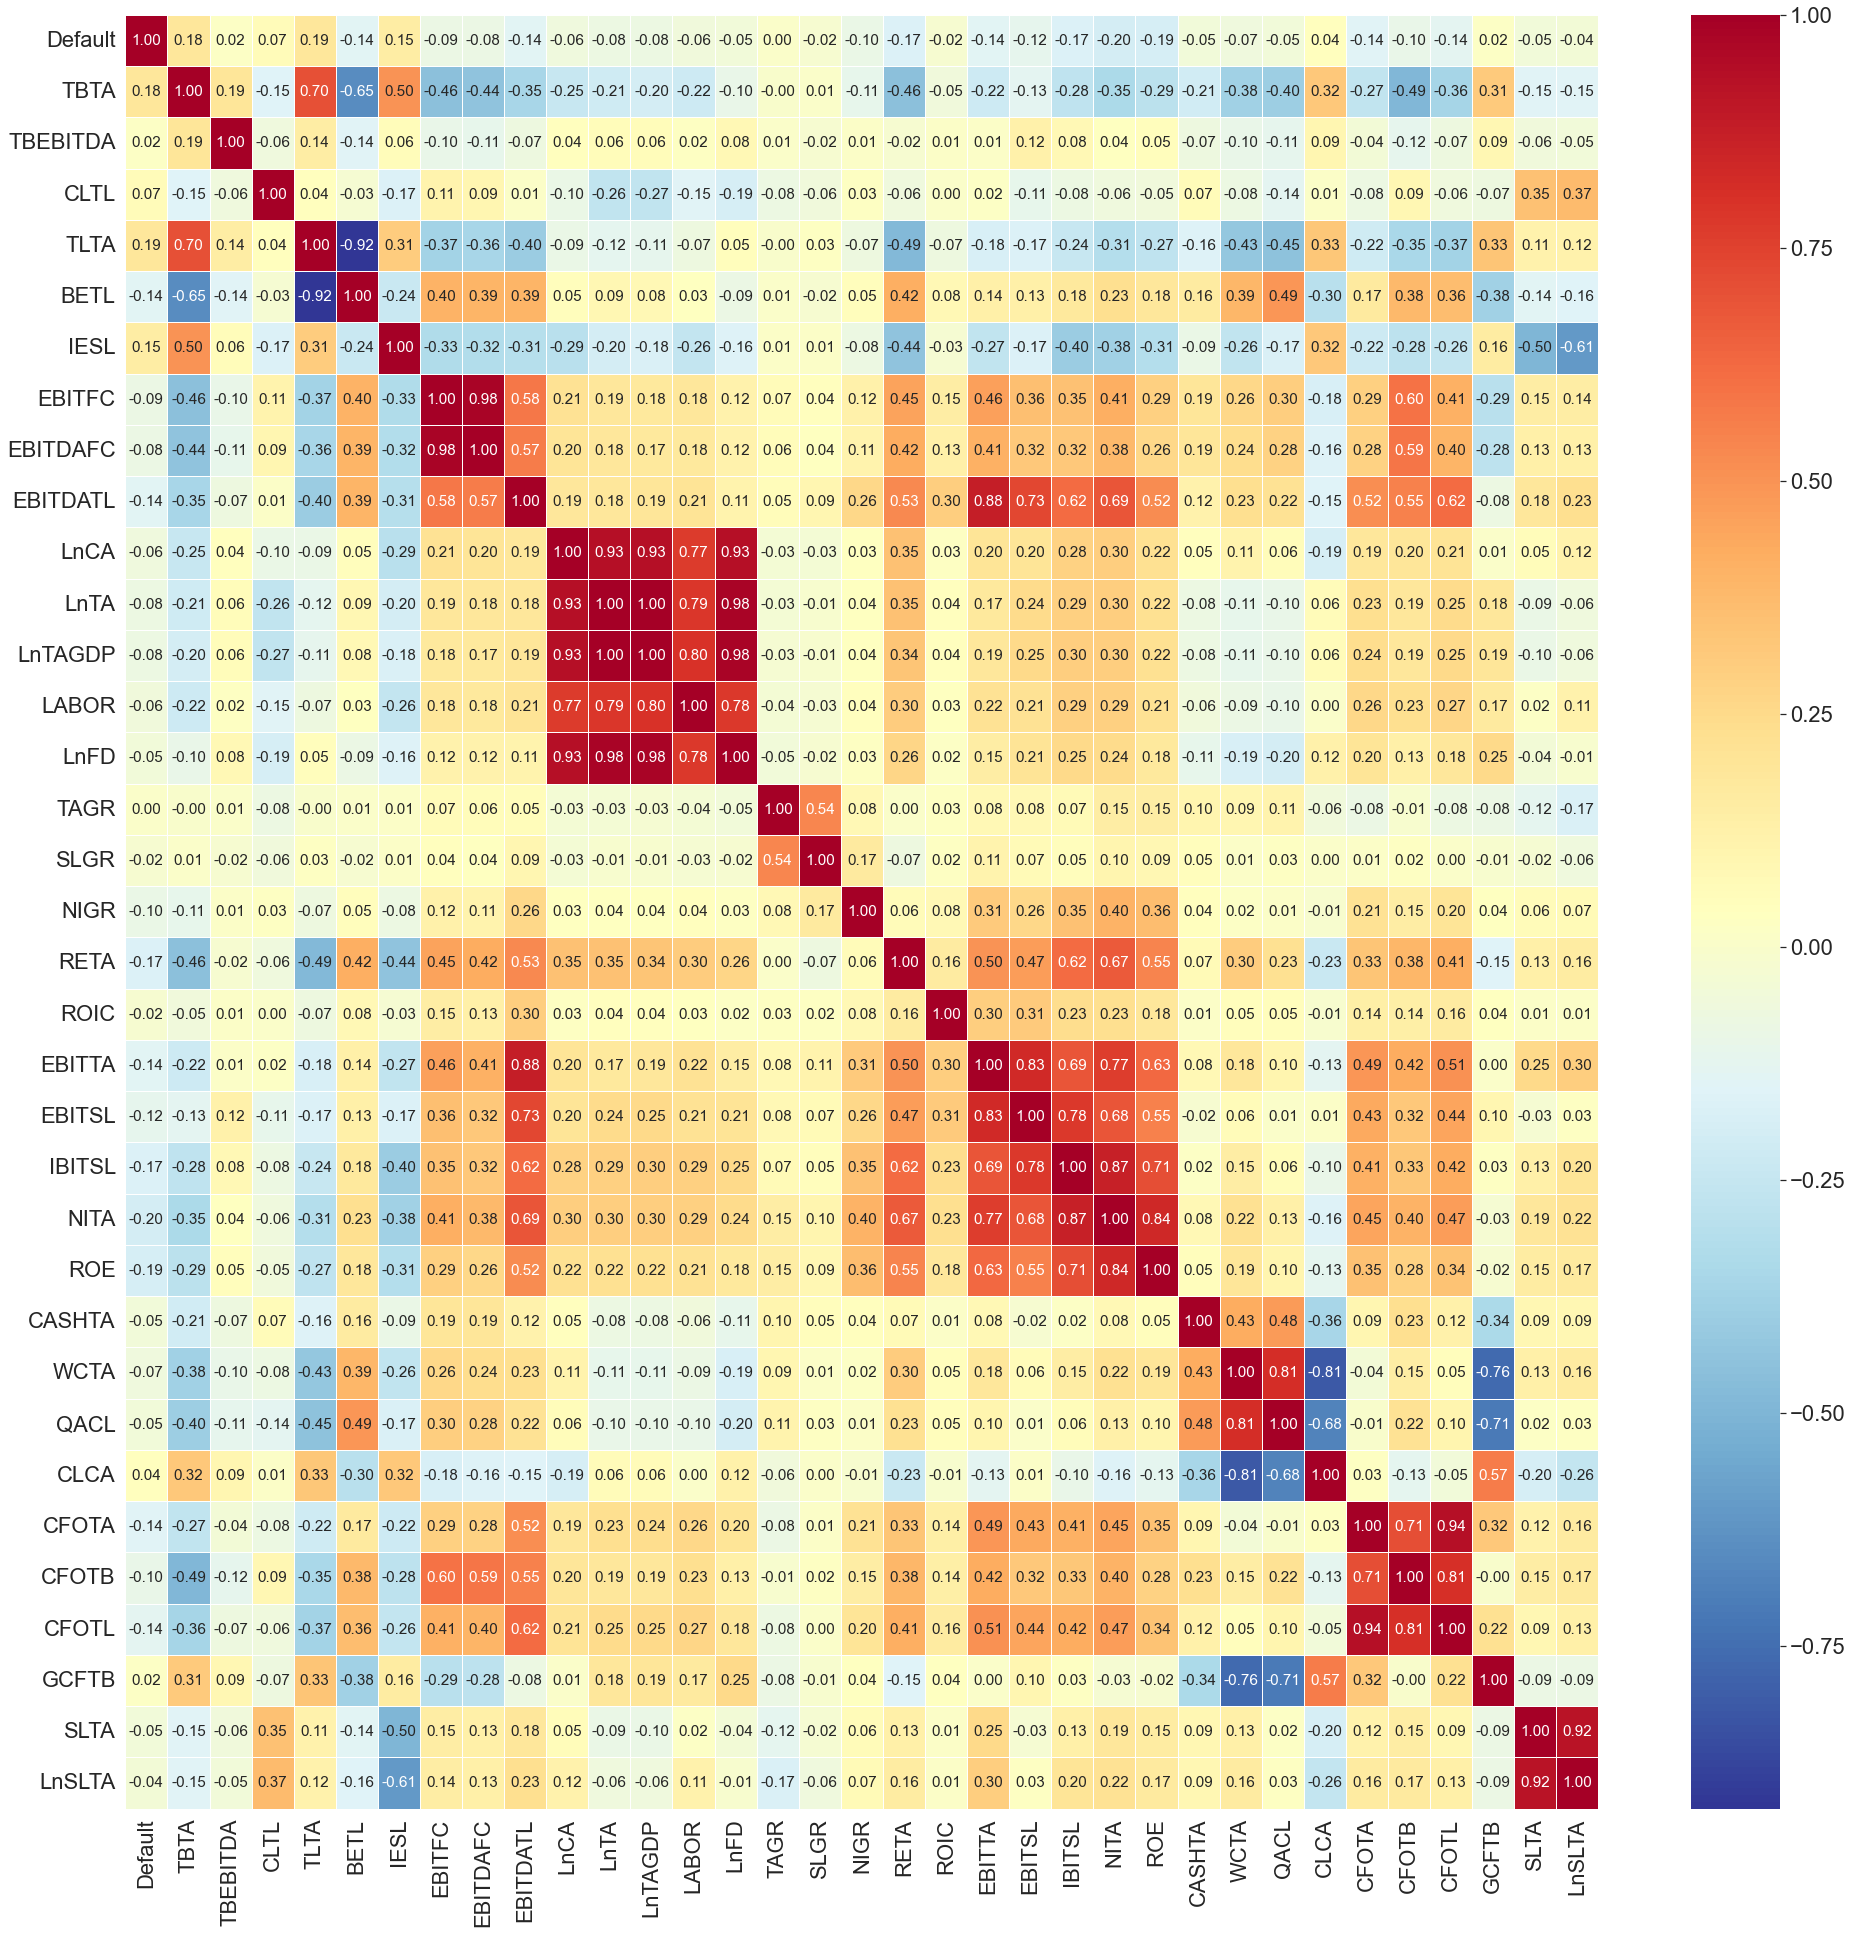

In [13]:
data_corr = heatmap_dt.corr()
parameters = {'xtick.labelsize': 20,'axes.titlesize': 60, 'ytick.labelsize': 16}
plt.rcParams.update(parameters)
plt.figure(figsize=(33, 33))

sns.set(font_scale=2)
sns.heatmap(data_corr, annot=True, annot_kws={
    "size": 90 / np.sqrt(len(data_corr))}, fmt='.2f', cmap='RdYlBu_r', linewidths=1,)
plt.savefig('corrmap_org.png')
plt.show()



### t-test

In [14]:
VarName = 'TBTA'

group1 = Failure_dt[Failure_dt['fail']==1][VarName]
group2 = Failure_dt[Failure_dt['fail']==0][VarName]

print(scipy.stats.ttest_ind(group1, group2))

pd.DataFrame([group1.mean(), group1.std(), group2.mean(), group2.std(),
              group1.mean() - group2.mean(), 
              scipy.stats.ttest_ind(group1, group2)[0],
              scipy.stats.ttest_ind(group1, group2)[1]])

Ttest_indResult(statistic=14.721615285769472, pvalue=3.0346981408969885e-48)


,0
0,9.567922e-01
1,8.436956e-01
2,-6.557433e-02
3,9.819882e-01
4,1.022367e+00
5,1.472162e+01
6,3.034698e-48


In [15]:
TBL4 = pd.DataFrame()

for VarName in feature_col:
    print(VarName)
    group1 = Failure_dt[Failure_dt['fail']==1][VarName]
    group2 = Failure_dt[Failure_dt['fail']==0][VarName]

    TRes = pd.DataFrame([group1.mean(), group1.std(), group2.mean(), group2.std(),
                      group1.mean() - group2.mean(), 
                      scipy.stats.ttest_ind(group1, group2)[0],
                      scipy.stats.ttest_ind(group1, group2)[1]])
    TBL4 = TBL4.append(TRes.T)
    
TBL4

TBTA
TBEBITDA
CLTL
TLTA
BETL
IESL
EBITFC
EBITDAFC
EBITDATL
LnCA
LnTA
LnTAGDP
LABOR
LnFD
TAGR
SLGR
NIGR
RETA
ROIC
EBITTA
EBITSL
IBITSL
NITA
ROE
CASHTA
WCTA
QACL
CLCA
CFOTA
CFOTB
CFOTL
GCFTB
SLTA
LnSLTA


,0,1,2,3,4,5,6
0,0.956792,0.843696,-0.065574,0.981988,1.022367,14.721615,3.034698e-48
0,0.085432,1.323036,-0.017420,0.981857,0.102852,1.455420,1.456038e-01
0,0.385626,0.940806,0.006957,1.006031,0.378670,5.310354,1.132211e-07
0,0.979084,0.749545,-0.065606,0.982793,1.044690,15.069952,1.980835e-50
0,-0.712264,0.424934,0.047658,1.005921,-0.759922,-10.782850,7.174327e-27
0,0.825580,1.216985,-0.022122,0.992591,0.847702,11.925625,1.965907e-32
0,-0.479291,0.201243,0.017645,1.021674,-0.496936,-6.958960,3.780738e-12
0,-0.461569,0.156645,0.016102,1.018217,-0.477671,-6.713626,2.067173e-11
0,-0.765253,0.794357,0.039660,1.029072,-0.804912,-11.086294,2.694182e-28
0,-0.344699,1.153553,0.000994,1.001231,-0.345693,-4.835094,1.362939e-06


### Logistic Regression

### Univariate

In [16]:
LogFormula = "fail ~ TBTA "
log_reg = smf.logit(LogFormula, data=Failure_dt).fit()

Optimization terminated successfully.
         Current function value: 0.128278
         Iterations 8


In [17]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   fail   No. Observations:                 6200
Model:                          Logit   Df Residuals:                     6198
Method:                           MLE   Df Model:                            1
Date:                Thu, 06 Apr 2023   Pseudo R-squ.:                  0.1168
Time:                        15:57:40   Log-Likelihood:                -795.32
converged:                       True   LL-Null:                       -900.48
Covariance Type:            nonrobust   LLR p-value:                 1.175e-47
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.8713      0.103    -37.630      0.000      -4.073      -3.670
TBTA           1.0795      0.080     13.448      0.000       0.922       1.237
==============================================================================
"""

In [18]:
res = pd.concat([pd.DataFrame(log_reg.params, columns=['coef']), pd.DataFrame(log_reg.tvalues, columns=['t-value']), pd.DataFrame(log_reg.pvalues, columns=['p-value'])], axis =1)
print(res)

               coef    t-value        p-value
Intercept -3.871263 -37.629722  7.022234e-310
TBTA       1.079518  13.448246   3.152621e-41


In [19]:
for VarName in feature_col:
    LogFormula = "fail ~ " + VarName
    log_reg = smf.logit(LogFormula, data=Failure_dt).fit()
    print(pd.concat([pd.DataFrame(log_reg.params, columns=['coef']), pd.DataFrame(log_reg.tvalues, columns=['t-value']), pd.DataFrame(log_reg.pvalues, columns=['p-value'])], axis =1))

Optimization terminated successfully.
         Current function value: 0.128278
         Iterations 8
               coef    t-value        p-value
Intercept -3.871263 -37.629722  7.022234e-310
TBTA       1.079518  13.448246   3.152621e-41
Optimization terminated successfully.
         Current function value: 0.145074
         Iterations 7
               coef    t-value   p-value
Intercept -3.378893 -47.422778  0.000000
TBEBITDA   0.097992   1.457212  0.145058
Optimization terminated successfully.
         Current function value: 0.142861
         Iterations 8
               coef    t-value       p-value
Intercept -3.457341 -45.009585  0.000000e+00
CLTL       0.404601   5.248466  1.533710e-07
Optimization terminated successfully.
         Current function value: 0.124960
         Iterations 9
               coef    t-value        p-value
Intercept -4.062905 -34.630351  8.828040e-263
TLTA       1.357729  13.832044   1.633129e-43
Optimization terminated successfully.
         Current fun

In [20]:
TBL5a = pd.DataFrame()

for VarName in feature_col:
    LogFormula = "fail ~ " + VarName
    log_reg = smf.logit(LogFormula, data=Failure_dt).fit()
    logres = pd.concat([pd.DataFrame(log_reg.params, columns=['coef']), pd.DataFrame(log_reg.tvalues, columns=['t-value']), pd.DataFrame(log_reg.pvalues, columns=['p-value'])], axis =1)
    
    TBL5a = TBL5a.append(logres.iloc[1:2])
    

Optimization terminated successfully.
         Current function value: 0.128278
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.145074
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.142861
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.124960
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.126297
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.137236
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.132328
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.130536
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.134204
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.143389


In [21]:
TBL5a

,coef,t-value,p-value
TBTA,1.079518,13.448246,3.152621e-41
TBEBITDA,0.097992,1.457212,1.450577e-01
CLTL,0.404601,5.248466,1.533710e-07
TLTA,1.357729,13.832044,1.633129e-43
BETL,-2.466845,-11.386015,4.909309e-30
IESL,0.524135,10.962489,5.788527e-28
EBITFC,-2.866156,-11.023583,2.941124e-28
EBITDAFC,-3.822614,-11.439154,2.664709e-30
EBITDATL,-0.887548,-11.550216,7.363473e-31
LnCA,-0.332671,-4.807847,1.525648e-06


### Multivariate

In [22]:
for Idx, VarName in enumerate(feature_col):
    if Idx == 0:
        LogFormula = "fail ~ " + VarName 
    else:
        LogFormula = LogFormula + " + " + VarName

LogFormula

'fail ~ TBTA + TBEBITDA + CLTL + TLTA + BETL + IESL + EBITFC + EBITDAFC + EBITDATL + LnCA + LnTA + LnTAGDP + LABOR + LnFD + TAGR + SLGR + NIGR + RETA + ROIC + EBITTA + EBITSL + IBITSL + NITA + ROE + CASHTA + WCTA + QACL + CLCA + CFOTA + CFOTB + CFOTL + GCFTB + SLTA + LnSLTA'

In [23]:
log_reg = smf.logit(LogFormula, data=Failure_dt).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.105692
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   fail   No. Observations:                 6200
Model:                          Logit   Df Residuals:                     6165
Method:                           MLE   Df Model:                           34
Date:                Thu, 06 Apr 2023   Pseudo R-squ.:                  0.2723
Time:                        15:57:41   Log-Likelihood:                -655.29
converged:                       True   LL-Null:                       -900.48
Covariance Type:            nonrobust   LLR p-value:                 2.869e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.8762      0.481    -12.205      0.000      -6.820      -4.933
TBTA           0.2869      0.133      2.155      0.031       0.026       0.548
TBEBITDA       0.0446      0.061      0.727      0.467      -0.076       0.165
CLTL           0.8530      0.146      5.860      0.000       0.568       1.138
TLTA           0.7766      0.344      2.255      0.024       0.102       1.452
BETL          -0.8423      0.558     -1.508      0.131      -1.937       0.252
IESL           0.0977      0.125      0.785      0.433      -0.146       0.342
EBITFC         5.9719      3.557      1.679      0.093      -1.000      12.944
EBITDAFC      -9.4706      4.549     -2.082      0.037     -18.387      -0.554
EBITDATL       0.2013      0.570      0.353      0.724      -0.915       1.318
LnCA          -0.0093      0.749     -0.012      0.990      -1.478       1.459
LnTA          -0.7056      1.637     -0.431      0.667      -3.915       2.504
LnTAGDP        4.1705      1.526      2.733      0.006       1.179       7.162
LABOR         -0.0558      0.165     -0.338      0.735      -0.380       0.268
LnFD          -3.2739      1.187     -2.758      0.006      -5.600      -0.947
TAGR           0.1824      0.084      2.175      0.030       0.018       0.347
SLGR          -0.0664      0.085     -0.783      0.434      -0.233       0.100
NIGR          -0.1361      0.084     -1.622      0.105      -0.301       0.028
RETA          -0.1669      0.142     -1.176      0.240      -0.445       0.111
ROIC           0.0432      0.065      0.664      0.507      -0.084       0.171
EBITTA        -0.3573      0.365     -0.978      0.328      -1.073       0.359
EBITSL         0.2623      0.199      1.320      0.187      -0.127       0.652
IBITSL         0.0296      0.174      0.170      0.865      -0.311       0.370
NITA          -0.3388      0.190     -1.787      0.074      -0.710       0.033
ROE            0.0839      0.074      1.128      0.259      -0.062       0.230
CASHTA        -0.3767      0.107     -3.531      0.000      -0.586      -0.168
WCTA           0.2633      0.226      1.165      0.244      -0.179       0.706
QACL           0.4689      0.177      2.645      0.008       0.121       0.816
CLCA          -0.0151      0.192     -0.079      0.937      -0.392       0.361
CFOTA          0.1880      0.392      0.480      0.631      -0.580       0.956
CFOTB         -0.1654      0.443     -0.374      0.709      -1.033       0.702
CFOTL         -0.4645      0.611     -0.760      0.447      -1.663       0.734
GCFTB          0.2888      0.327      0.882      0.378      -0.353       0.930
SLTA          -0.7215      0.277     -2.607      0.009      -1.264      -0.179
LnSLTA         0.5554      0.310      1.791      0.073      -0.053       1.163
==============================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In

In [24]:
TBL5b = pd.concat([pd.DataFrame(log_reg.params, columns=['coef']), pd.DataFrame(log_reg.tvalues, columns=['t-value']), pd.DataFrame(log_reg.pvalues, columns=['p-value'])], axis =1)
TBL5b

,coef,t-value,p-value
Intercept,-5.876157,-12.205405,2.908589e-34
TBTA,0.286889,2.155148,3.115022e-02
TBEBITDA,0.044635,0.726836,4.673266e-01
CLTL,0.852968,5.860153,4.624408e-09
TLTA,0.776642,2.254838,2.414351e-02
BETL,-0.842310,-1.508304,1.314767e-01
IESL,0.097726,0.784549,4.327183e-01
EBITFC,5.971857,1.678878,9.317577e-02
EBITDAFC,-9.470597,-2.081792,3.736149e-02
EBITDATL,0.201256,0.353260,7.238934e-01


### Logistic LASSO


sklearn

In [25]:
y_var = Failure_dt['fail']
x_var = Failure_dt[feature_col]

### LASSO Example

In [26]:
under_model = LogisticRegression(
    penalty='l1',
    fit_intercept=True,
    max_iter =10000,
    solver='liblinear',  # 'saga' or 'liblinear'
    C=0.01)

under_model.fit(x_var, y_var)
coef_res = pd.DataFrame(under_model.coef_)
coef_res.columns = feature_col
coef_res.T

,0
TBTA,0.109635
TBEBITDA,0.000000
CLTL,0.000000
TLTA,0.222583
BETL,0.000000
IESL,0.000000
EBITFC,0.000000
EBITDAFC,0.000000
EBITDATL,0.000000
LnCA,0.000000


### LASSO Loop

In [27]:
TBL5c = pd.DataFrame()

c_vector = list(range(15,0,-1))

for c_num in c_vector:
    under_model = LogisticRegression(
                                penalty='l1',
                                fit_intercept=True,
                                max_iter =10000,
                                solver='liblinear',  # 'saga' or 'liblinear'
                                C = c_num/220)

    under_model.fit(x_var, y_var)
    coef_res = pd.DataFrame(under_model.coef_)
    TBL5c = pd.concat([TBL5c, coef_res])

TBL5c.columns = feature_col
TBL5c.T


,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TBTA,0.289226,0.279382,0.271789,0.263363,0.255354,0.249207,0.243127,0.234915,0.223015,0.209789,0.193714,0.169743,0.143409,0.095131,0.000000
TBEBITDA,0.003439,0.000291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CLTL,0.334393,0.314942,0.296275,0.275300,0.254266,0.233451,0.209027,0.180292,0.149745,0.119239,0.081672,0.032103,0.000000,0.000000,0.000000
TLTA,0.711395,0.698343,0.679990,0.659042,0.637183,0.612916,0.582864,0.545571,0.507059,0.472945,0.434398,0.385852,0.312153,0.195286,0.000000
BETL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
IESL,0.112735,0.111745,0.111511,0.111278,0.110094,0.107429,0.104814,0.103434,0.093677,0.078705,0.062260,0.040466,0.012073,0.000000,0.000000
EBITFC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
EBITDAFC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
EBITDATL,-0.066379,-0.053409,-0.040738,-0.026721,-0.012127,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LnCA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Random Forest using undersampling

In [28]:
split_col = ['year','fail', *feature_col]

In [29]:
X_tr, X_te, y_tr, y_te = train_test_split(CorpBond_dtn[split_col],CorpBond_dtn['yearfail'],test_size=.3,random_state=42, stratify=CorpBond_dtn['yearfail'])

In [30]:
TBL1b = pd.concat([X_tr[['year','fail']].groupby('year').count(),
                   X_tr[['year','fail']].groupby('year').sum(),
                   X_te[['year','fail']].groupby('year').count(),
                   X_te[['year','fail']].groupby('year').sum()], axis = 1)

TBL1b

,fail,fail,fail,fail
year,,,,
101,147,18,63,8
102,82,15,34,6
103,193,8,84,4
104,223,5,95,2
105,274,10,117,4
106,241,8,104,4
107,180,6,76,2
108,177,9,76,4
109,182,2,78,1


In [31]:
X_train  = X_tr[feature_col]
X_test   = X_te[feature_col]
y_train  = X_tr['fail']
y_test   = X_te['fail']

In [32]:
Sim_Num = 1000

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4340, 34)
(1860, 34)
(4340,)
(1860,)


In [33]:
def eval_matric(real_value, predict_value):
    auc         = roc_auc_score(real_value, predict_value, average = 'weighted')
    f1score     = f1_score(real_value, predict_value, average = 'weighted')
    mcc_value   = matthews_corrcoef(real_value, predict_value)
    GEval       = score(real_value, predict_value)
    sensitivity = (GEval[1][1])
    specificity = (GEval[1][0])
    GMean       = (np.sqrt(GEval[1][1]*GEval[1][0]))
    eval_res    = [sensitivity, specificity, f1score, auc, GMean, mcc_value]
    return eval_res

In [34]:
RF_coef = pd.DataFrame()
RF_proba_A = pd.DataFrame()
featureimp=[]

for i in range(Sim_Num):
    ros = RandomUnderSampler(random_state=i)
    X_train0, y_train0 = ros.fit_resample(X_train, y_train)
    under_model = RandomForestClassifier(n_estimators = 80, min_impurity_decrease=0.00075, criterion = "entropy", random_state=42)
    under_model.fit(X_train0,y_train0)

    featureimp.append(under_model.feature_importances_)

    y_proba_a = pd.DataFrame(under_model.predict_proba(X_test))[1]
    df_pred_a = pd.DataFrame(y_proba_a).T
    RF_proba_A = RF_proba_A.append(df_pred_a)
    if (i % 100) == 0:
        print(i)


0
100
200
300
400
500
600
700
800
900


In [35]:
y_pred_A   = RF_proba_A.mean(axis=0).apply(lambda x : 1 if x >= 0.5 else 0)
RF_feature = pd.DataFrame(featureimp).mean(axis=0)
eval_matric(y_test,y_pred_A)

[0.9,
 0.7333333333333333,
 0.8231519579423734,
 0.8166666666666667,
 0.812403840463596,
 0.24734425833427715]

In [36]:
y_pred_A

0       0
1       0
2       0
3       0
4       1
       ..
1855    0
1856    0
1857    0
1858    0
1859    0
Length: 1860, dtype: int64

In [37]:
RF_feature

0     0.054218
1     0.019665
2     0.026254
3     0.053590
4     0.059900
5     0.044493
6     0.056930
7     0.057260
8     0.028041
9     0.017848
10    0.017583
11    0.019851
12    0.016338
13    0.017199
14    0.023974
15    0.021075
16    0.018385
17    0.040476
18    0.021969
19    0.016451
20    0.019005
21    0.036893
22    0.054650
23    0.025426
24    0.023341
25    0.020540
26    0.016844
27    0.017784
28    0.028507
29    0.039489
30    0.027834
31    0.019157
32    0.019888
33    0.019142
dtype: float64

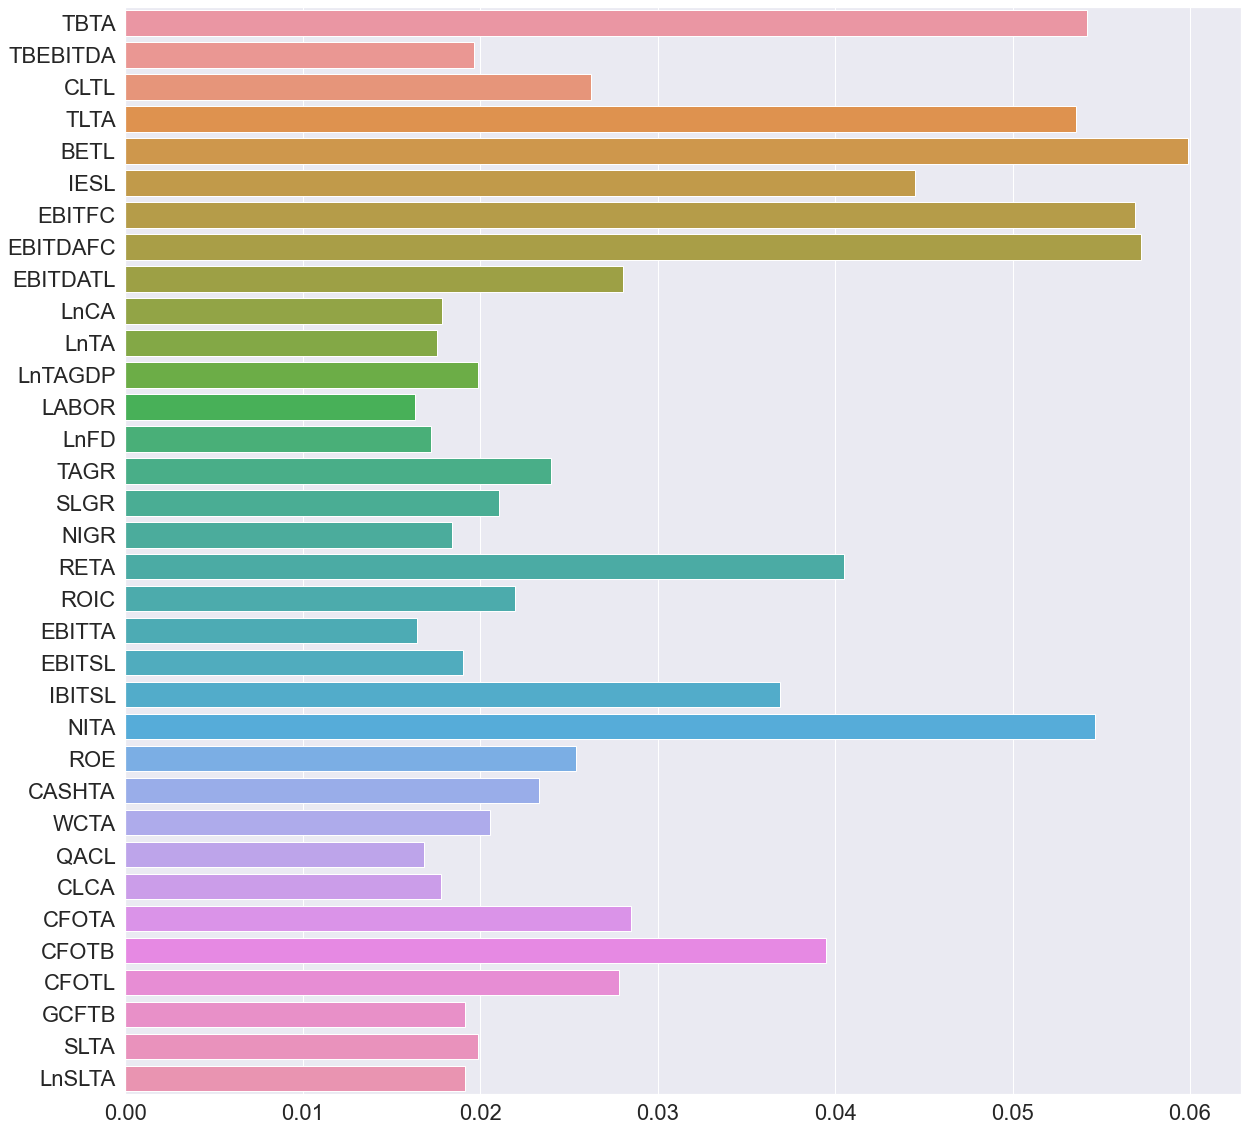

In [38]:
plt.figure(figsize=(20, 20))
sns.barplot(x=RF_feature, y= feature_col)
plt.show()

###  Moving Window Evaluation

In [39]:
MW_S_Year = list(range(101,112,1))

MW_Length = 7
PD_Length = 3

Sim_Num = 1000

In [40]:
MW_S_Year

[101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111]

In [41]:
RF_eval_res = pd.DataFrame()
RF_feature_res = pd.DataFrame()

Period_R_res = pd.DataFrame()


for yy in (MW_S_Year):
    Train_S = yy
    Train_E = yy + MW_Length - 1
    Testing_S = yy + MW_Length
    Testing_E = yy + MW_Length + PD_Length - 1
    Period_R = [Train_S, Train_E, Testing_S, Testing_E]

    TrainSample = CorpBond_dtn[(CorpBond_dtn['year'] <= Train_E) & (CorpBond_dtn['year'] >= Train_S)]
    TestSample = CorpBond_dtn[(CorpBond_dtn['year'] <= Testing_E) & (CorpBond_dtn['year'] >= Testing_S)]

    X_train = TrainSample[feature_col]
    X_test = TestSample[feature_col]
    y_train = TrainSample['fail']
    y_test = TestSample['fail']

    # ### Random Forest Undersampling
    RF_proba_A = pd.DataFrame()
    featureimp=[]

    for i in range(Sim_Num):
        ros = RandomUnderSampler(random_state=i)
        X_train0, y_train0 = ros.fit_resample(X_train, y_train)
        under_model = RandomForestClassifier(n_estimators = 80, min_impurity_decrease=0.00075, criterion = "entropy", random_state=42)
        under_model.fit(X_train0,y_train0)

        featureimp.append(under_model.feature_importances_)

        y_proba_a = pd.DataFrame(under_model.predict_proba(X_test))[1]
        df_pred_a = pd.DataFrame(y_proba_a).T
        RF_proba_A = RF_proba_A.append(df_pred_a)
        
        # print(i)

    y_pred_A = RF_proba_A.mean(axis=0).apply(lambda x : 1 if x >= 0.5 else 0)

    RF_eval = pd.DataFrame(eval_matric(y_test,y_pred_A)).T
    RF_feature = pd.DataFrame(pd.DataFrame(featureimp).mean(axis=0))

    RF_eval_res = RF_eval_res.append(RF_eval)
    RF_feature_res = RF_feature_res.append(RF_feature.T)
       
    print(Period_R)



[101, 107, 108, 110]
[102, 108, 109, 111]
[103, 109, 110, 112]
[104, 110, 111, 113]
[105, 111, 112, 114]
[106, 112, 113, 115]
[107, 113, 114, 116]
[108, 114, 115, 117]
[109, 115, 116, 118]
[110, 116, 117, 119]
[111, 117, 118, 120]


In [42]:
RF_eval_res.columns = ['sensitivity', 'specificity', 'f1-score', 'AUC', 'G-Mean', 'MCC']
RF_eval_res

,sensitivity,specificity,f1-score,AUC,G-Mean,MCC
0,0.700000,0.878667,0.913073,0.789333,0.784262,0.268206
0,0.578947,0.869781,0.911776,0.724364,0.709618,0.175200
0,0.678571,0.820764,0.877678,0.749668,0.746289,0.204111
0,0.666667,0.808490,0.862335,0.737578,0.734161,0.220750
0,0.718750,0.796632,0.854657,0.757691,0.756690,0.241704
0,0.760000,0.814044,0.871908,0.787022,0.786558,0.248750
0,0.916667,0.757177,0.841553,0.836922,0.833114,0.252517
0,0.888889,0.721854,0.817219,0.805372,0.801030,0.224320
0,0.896552,0.719792,0.815756,0.808172,0.803325,0.227283
0,0.894737,0.762314,0.853173,0.828526,0.825876,0.182899


In [43]:
print(RF_eval_res.mean())
print(RF_eval_res.std())

sensitivity    0.777902
specificity    0.795671
f1-score       0.863651
AUC            0.786786
G-Mean         0.782771
MCC            0.219681
dtype: float64
sensitivity    0.117172
specificity    0.052312
f1-score       0.032337
AUC            0.039338
G-Mean         0.041327
MCC            0.032880
dtype: float64


In [44]:
RF_feature_res.columns = feature_col
RF_feature_res

,TBTA,TBEBITDA,CLTL,TLTA,BETL,IESL,EBITFC,EBITDAFC,EBITDATL,LnCA,...,CASHTA,WCTA,QACL,CLCA,CFOTA,CFOTB,CFOTL,GCFTB,SLTA,LnSLTA
0,0.115277,0.028352,0.022917,0.044720,0.047054,0.033327,0.024470,0.022989,0.024651,0.016454,...,0.021916,0.022432,0.017917,0.019216,0.026595,0.037700,0.033177,0.022597,0.018340,0.017961
0,0.100096,0.018649,0.021529,0.048222,0.050695,0.029764,0.034196,0.038818,0.019277,0.019729,...,0.022855,0.016843,0.015997,0.017190,0.023811,0.033586,0.028054,0.019765,0.015437,0.014668
0,0.108685,0.019219,0.021980,0.051746,0.054454,0.028349,0.037803,0.035781,0.020250,0.026714,...,0.024928,0.017288,0.017865,0.016793,0.018422,0.032393,0.025485,0.019454,0.015191,0.014448
0,0.105771,0.019449,0.023283,0.053729,0.059793,0.023260,0.046538,0.041881,0.020161,0.026236,...,0.023886,0.015882,0.018283,0.015707,0.013939,0.024403,0.024060,0.018518,0.015395,0.015128
0,0.074648,0.019994,0.025505,0.055884,0.060279,0.027961,0.049493,0.046181,0.018700,0.025625,...,0.026326,0.019156,0.016857,0.016855,0.026530,0.038922,0.035516,0.020318,0.014848,0.014675
0,0.067453,0.022202,0.026555,0.056891,0.065106,0.026400,0.036886,0.044162,0.026919,0.025887,...,0.025530,0.015634,0.016193,0.017117,0.034220,0.045915,0.041042,0.019326,0.016410,0.016199
0,0.035448,0.022454,0.028012,0.046845,0.049782,0.035887,0.049171,0.057953,0.030897,0.021300,...,0.028750,0.016232,0.017279,0.017275,0.033647,0.044958,0.037640,0.020608,0.015928,0.015327
0,0.035460,0.024377,0.027516,0.041616,0.045327,0.037154,0.054915,0.064938,0.045241,0.020470,...,0.024987,0.014842,0.016421,0.016374,0.039800,0.044788,0.032499,0.021357,0.015090,0.015106
0,0.030849,0.023785,0.033689,0.036612,0.039056,0.036093,0.063957,0.070182,0.038476,0.020027,...,0.021905,0.015353,0.018576,0.016989,0.043954,0.053243,0.036484,0.023397,0.016235,0.015787
0,0.021362,0.023777,0.036389,0.039350,0.038419,0.033912,0.059396,0.072945,0.055459,0.018427,...,0.024425,0.015396,0.017886,0.017300,0.032141,0.033511,0.032390,0.017756,0.017247,0.016354


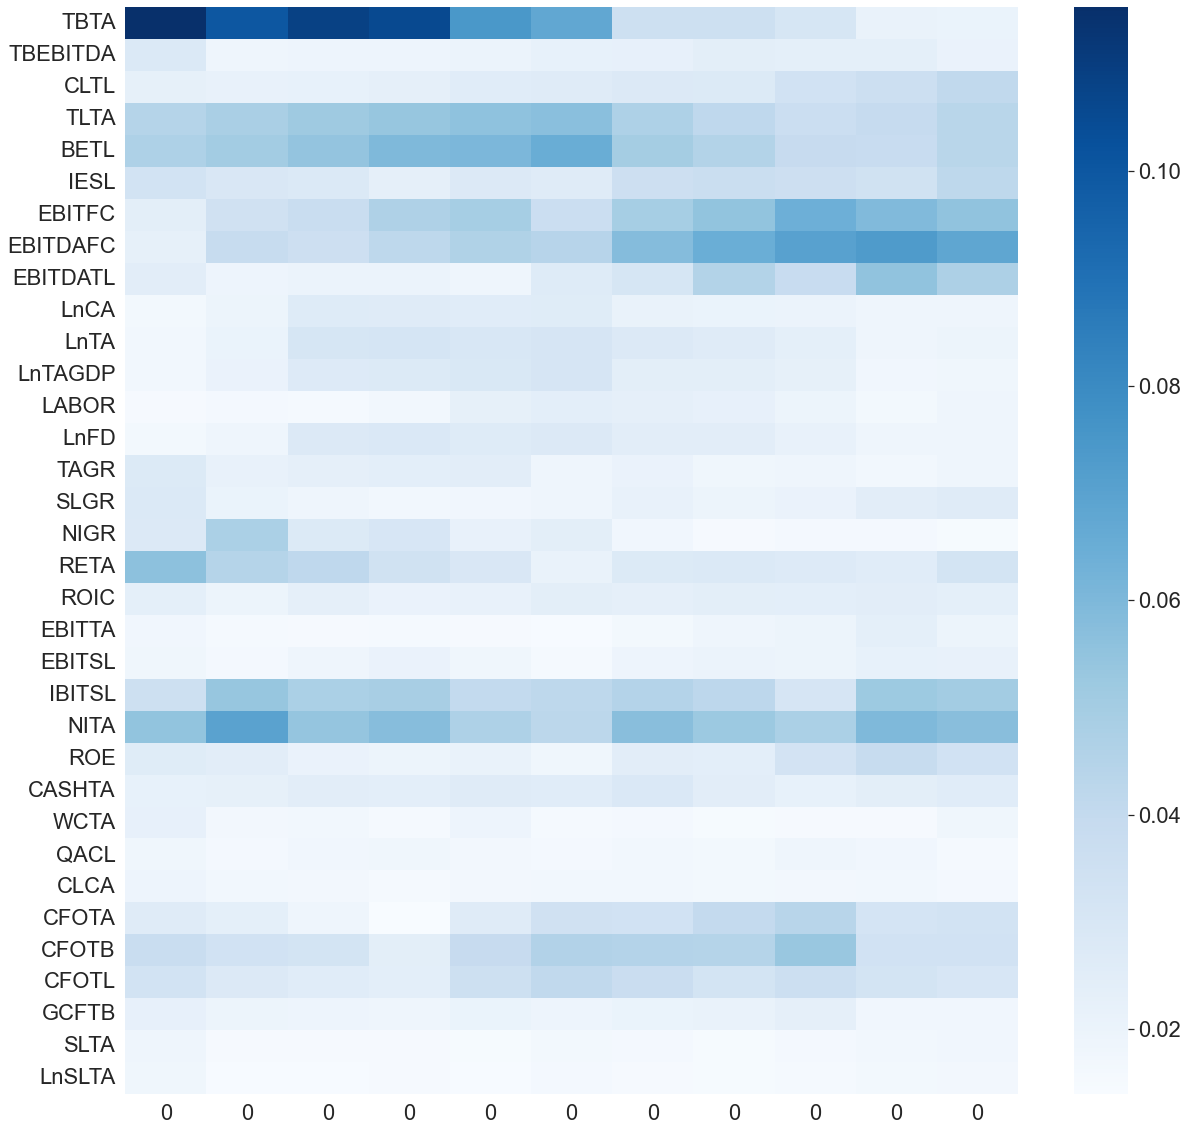

In [45]:
plt.figure(figsize=(20,20))
sns.heatmap(RF_feature_res.T,cmap='Blues',annot=False)
plt.show()

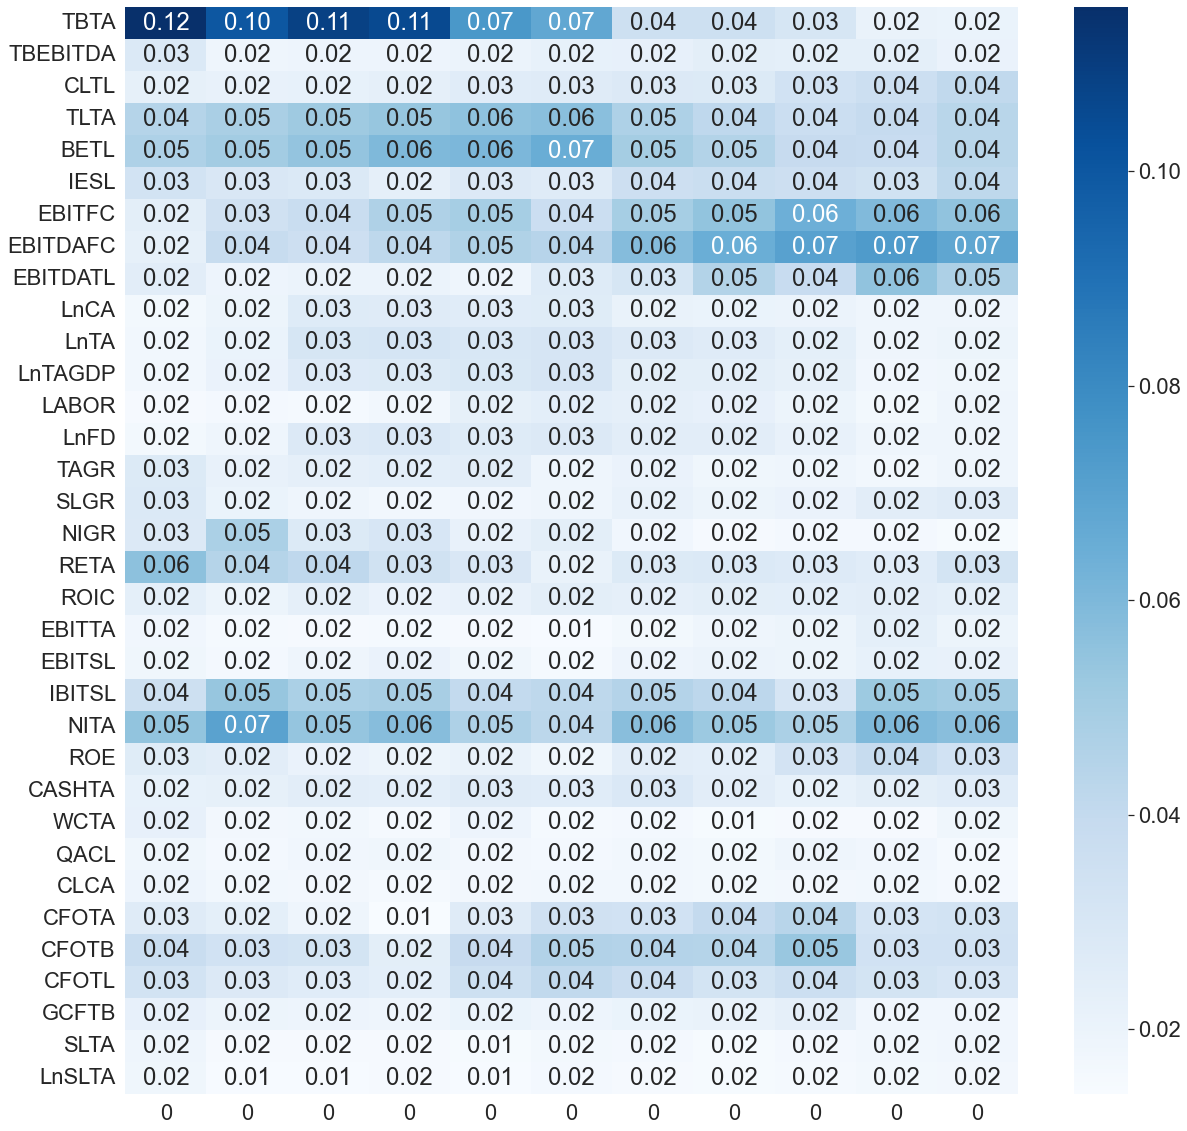

In [46]:
plt.figure(figsize=(20,20))
sns.heatmap(RF_feature_res.T,cmap='Blues',annot=True, fmt='.2f')
plt.show()